In [73]:
import os
import re
import numpy as np 
import time
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
colores_rutas = ['green', 'orange', 'purple', 'brown', 'pink', 'blue', 'black', 'red', 'yellow', 'grey']

import numpy as np

In [74]:
with open ("A-n45-k7.vrp") as archivo:
    nomb = ""
    dim = 0
    veh = 0
    cap = 0
    autos = []
    x_coord = []
    y_coord = []
    dema = {}  
    coordenadas = False  
    demandas = False  
    
    for linea in archivo:

        if linea.startswith("NAME"):
            nomb = (linea.strip().split(":")[1]).strip() + ".vrp"

        if linea.startswith("COMMENT"):
            resultado = re.search(r'of trucks:\s*(\d+)', linea, re.IGNORECASE)
            if resultado:
                veh = int(resultado.group(1))

        if linea.startswith("VEHIC"):
            veh = int(linea.strip().split(":")[1])
                
        if linea.startswith("DIMEN"):
            dim = int(linea.strip().split(":")[1])

        elif linea.startswith("CAPAC"):
            cap = int(linea.strip().split(":")[1])

        elif linea.startswith("NODE_COORD_SECTION"):
            coordenadas = True
            continue

        elif linea.startswith("DEMAND_SECTION"):
            coordenadas = False
            demandas = True
            continue

        elif linea.startswith("DEPOT_SECTION"):
            demandas = False

        elif coordenadas:
            coords = linea.split()
            if len(coords) >= 3:  
                x_coord.append(float(coords[1]))
                y_coord.append(float(coords[2]))

        elif demandas:
            demands = linea.split()
            if len(demands) >= 2:
                nodo, dem = int(demands[0]), int(demands[1])
                dema[nodo - 1] = dem  

for i in range(veh):
    autos.append(i+1)
        
cap_x_veh = {i: cap for i in range(1, veh + 1)}

In [75]:
n = dim

clientes = [i for i in range(n)]
arcos = [(i,j) for i in range(n) for j in range(n) if i!=j]

vehiculos = veh
capacidad = cap
q = dema

x = x_coord
y = y_coord

In [76]:

distancia = {(i,j): np.hypot(x[i] - x[j], y[i] - y[j]) for i,j in arcos}

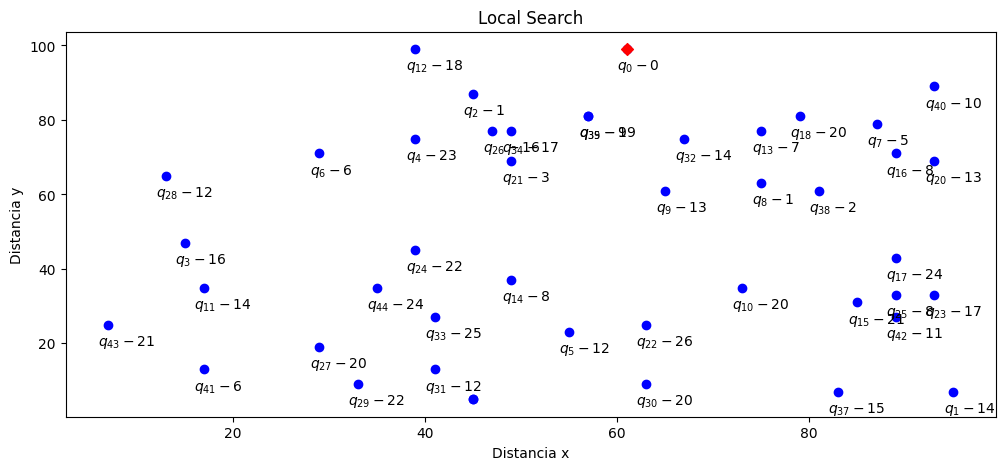

In [77]:
#Grafico
plt.figure(figsize = (12,5))
plt.scatter(x,y, color = 'blue')

#DC
plt.scatter(x[0], y[0], color = 'red', marker = 'D')

#Clientes y demanda
for i in clientes:
    plt.annotate('$q_{%d} - %d$'%(i,q[i]), (x[i]-1, y[i]-5.5))

plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.title("Local Search")

plt.show()

In [78]:
# Funciones para la heurística de inserción más cercana
def calcular_distancia(i, j):
    return distancia[i, j]

In [79]:
def nodo_mas_cercano(ciclo, nodos_sin_incluir):
    return min(nodos_sin_incluir, key=lambda x: calcular_distancia(ciclo[-1], x))

def insercion_mas_cercana(ciclo, nodo_cercano):
    if calcular_distancia(ciclo[-1], nodo_cercano) < calcular_distancia(ciclo[0], nodo_cercano):
        # Insertar al final del ciclo
        ciclo.append(nodo_cercano)
    else:
        # Insertar en otra posición
        indice = np.argmin([calcular_distancia(ciclo[i], nodo_cercano) +
                            calcular_distancia(nodo_cercano, ciclo[i + 1]) -
                            calcular_distancia(ciclo[i], ciclo[i + 1]) for i in range(len(ciclo) - 1)])
        ciclo.insert(indice + 1, nodo_cercano)


In [80]:
def heuristica_insercion_mas_cercana(x, y, capacidad, demandas):
    ciclo = [0, np.random.choice(clientes), np.random.choice(clientes)]
    nodos_sin_incluir = set(clientes) - set(ciclo)
    
    while nodos_sin_incluir:
        nodo_cercano = nodo_mas_cercano(ciclo, nodos_sin_incluir)
        insercion_mas_cercana(ciclo, nodo_cercano)
        nodos_sin_incluir.remove(nodo_cercano)

    return ciclo

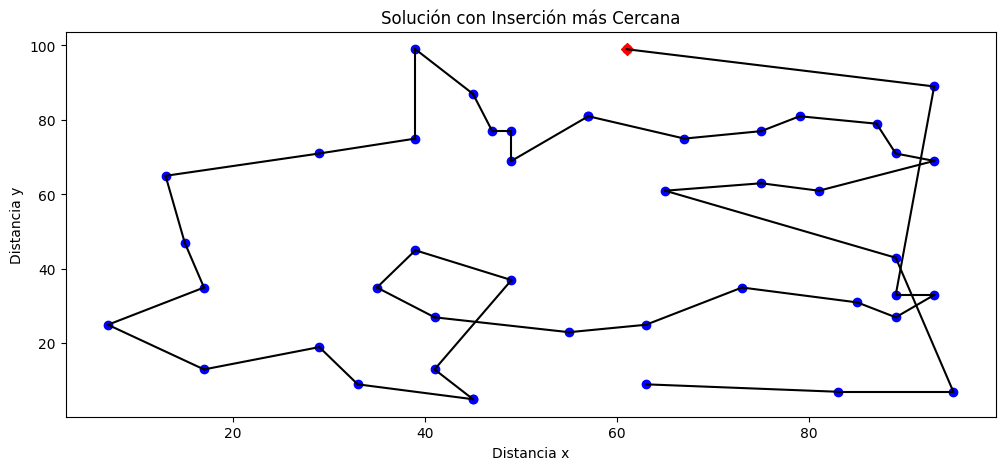

In [81]:
# Ejecutar la heurística con los datos cargados del archivo VRP
solucion_insercion_cercana = heuristica_insercion_mas_cercana(x, y, capacidad, dema)

# Visualización de la solución
plt.figure(figsize=(12, 5))
plt.scatter(x, y, color='blue')
plt.scatter(x[0], y[0], color='red', marker='D')

for i in range(1, len(solucion_insercion_cercana)):
    plt.plot([x[solucion_insercion_cercana[i-1]], x[solucion_insercion_cercana[i]]],
             [y[solucion_insercion_cercana[i-1]], y[solucion_insercion_cercana[i]]], color='black')

plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.title("Solución con Inserción más Cercana")
plt.show()